In [42]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import DATA_ANALYSIS_PATH

%matplotlib inline

In [2]:
os.chdir('/mnt/nas/Forest/MG-RAST_Dataset_Analysis')
id_list = os.listdir(DATA_ANALYSIS_PATH)

In [74]:
headers = ['#ID',
'Avg_fold',
'Length',
'Ref_GC',
'Covered_percent',
'Covered_bases',
'Plus_reads',
'Minus_reads',
'Read_GC',
'Median_fold',
'Std_Dev',
'MG_RAST_ID']

master_df = pd.DataFrame(columns=headers)

for id in id_list:
    os.chdir('/mnt/nas/Forest/MG-RAST_Dataset_Analysis/metagenomes/' + id)
    
    try:
        covstats = glob.glob('*covstats.txt')[0]
    except IndexError:
        break
    
    # covstats.txt into a dataframe
    df = pd.read_table(covstats, sep="\s", engine='python')
    
    # Add ID column
    df['MG_RAST_ID'] = id 
    
    # Filter for good hits
    df_to_append = df.loc[(df['Covered_percent'] >= 80.00) & (df['#ID'] != 'IGS-Control')]
    
    master_df = master_df.append(df_to_append)

In [75]:
# Sort table
master_df.sort_values(['MG_RAST_ID','#ID','Covered_percent'])

,#ID,Avg_fold,Length,Ref_GC,Covered_percent,Covered_bases,Plus_reads,Minus_reads,Read_GC,Median_fold,Std_Dev,MG_RAST_ID
11,MACRO-AZI-6b_,30.2847,3066,0.6732,96.9015,2971,488,410,0.6432,13,35.51,4481963.3
11,MACRO-AZI-6b_,7.4605,3066,0.6732,90.4436,2773,95,88,0.6356,4,8.03,4481970.3
9,MACRO-TYL-17_,2.6943,1377,0.6892,90.0508,1240,17,20,0.6745,2,2.30,4502543.3
11,MACRO-AZI-6b_,5.0574,3066,0.6732,90.7697,2783,75,72,0.6591,3,7.73,4502925.3
9,MACRO-TYL-17_,4.5396,1377,0.6892,89.9782,1239,36,27,0.6789,4,3.56,4502926.3
11,MACRO-AZI-6b_,8.1468,3066,0.6732,86.3992,2649,136,112,0.6560,4,12.57,4502930.3
11,MACRO-AZI-6b_,5.6703,3066,0.6732,84.5727,2593,88,82,0.6536,3,6.34,4511049.3
11,MACRO-AZI-6b_,4.4276,3066,0.6732,85.2250,2613,71,67,0.6560,3,4.62,4511111.3
2,SCT-TET-7_,2.6222,1236,0.6044,80.5016,995,11,22,0.6057,2,2.18,4511111.3
11,MACRO-AZI-6b_,6.6963,3066,0.6732,89.8239,2754,104,102,0.6617,4,7.36,4511114.3


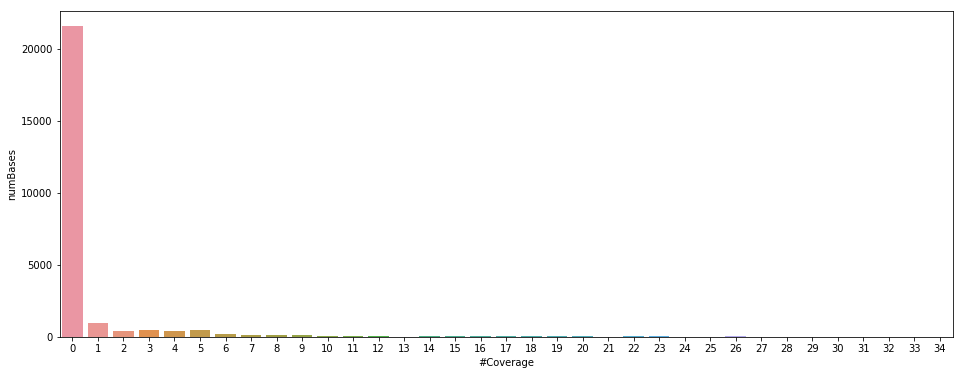

In [50]:
covhist_table = pd.read_table(covhist, sep="\s", engine='python')
plt.figure(figsize=(16, 6))
sns.barplot(x='#Coverage', y='numBases', data=covhist_table)